## Importing the Libraries

In [6]:
# Importing my libraries 
import pandas as pd
import numpy as np

In [7]:
# Loading the data
df= pd.read_csv('../data/raw/data.csv')
df.sample(5)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
26077,TransactionId_32894,BatchId_66247,AccountId_1825,SubscriptionId_4080,CustomerId_2216,UGX,256,ProviderId_6,ProductId_22,utility_bill,ChannelId_3,10000.0,11200,2018-12-14T07:27:55Z,2,0
27814,TransactionId_111761,BatchId_38711,AccountId_689,SubscriptionId_1952,CustomerId_1031,UGX,256,ProviderId_6,ProductId_3,airtime,ChannelId_3,1000.0,1000,2018-12-14T20:51:14Z,2,0
53306,TransactionId_49901,BatchId_138603,AccountId_4249,SubscriptionId_4429,CustomerId_7343,UGX,256,ProviderId_4,ProductId_10,airtime,ChannelId_2,-25000.0,25000,2019-01-08T10:46:33Z,4,0
12581,TransactionId_82689,BatchId_52553,AccountId_3967,SubscriptionId_102,CustomerId_4417,UGX,256,ProviderId_6,ProductId_3,airtime,ChannelId_3,1000.0,1000,2018-12-01T06:35:58Z,2,0
12352,TransactionId_29647,BatchId_44147,AccountId_1894,SubscriptionId_3373,CustomerId_2288,UGX,256,ProviderId_6,ProductId_19,tv,ChannelId_3,4000.0,4000,2018-11-30T19:44:15Z,2,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

## Basic structure of the data

In [24]:

# Display basic structure
print("📌 Number of Rows and Columns:")
print(df.shape)

print("\n📌 Data Types:")
print(df.dtypes)

print("\n📌 Summary of Missing Values:")
print(df.isnull().sum())


📌 Number of Rows and Columns:
(95662, 16)

📌 Data Types:
TransactionId                        object
BatchId                              object
AccountId                            object
SubscriptionId                       object
CustomerId                           object
CurrencyCode                         object
CountryCode                           int64
ProviderId                           object
ProductId                            object
ProductCategory                      object
ChannelId                            object
Amount                              float64
Value                                 int64
TransactionStartTime    datetime64[ns, UTC]
PricingStrategy                       int64
FraudResult                           int64
dtype: object

📌 Summary of Missing Values:
TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId   

## Parsing the TransactionStartTime column to the date type

In [10]:
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'], utc=True)

### checking the chaged datatype

In [11]:
print("\n Data Types:")
df['TransactionStartTime'].dtype




 Data Types:


datetime64[ns, UTC]

## Measures of central tendecy

In [13]:
import pandas as pd

# Summary statistics for central tendency & dispersion
print(" Descriptive Statistics:")
display(df.describe().T)   # transpose for easier reading

# Skewness (measures asymmetry of the distribution)
print("\n Skewness (Distribution Asymmetry):")
display(df.skew(numeric_only=True))

# Kurtosis (measures tail heaviness)
print("\n Kurtosis (Tail Heaviness):")
display(df.kurtosis(numeric_only=True))


 Descriptive Statistics:


,count,mean,std,min,25%,50%,75%,max
CountryCode,95662.0,256.000000,0.000000,256.0,256.0,256.0,256.0,256.0
Amount,95662.0,6717.846433,123306.797164,-1000000.0,-50.0,1000.0,2800.0,9880000.0
Value,95662.0,9900.583941,123122.087776,2.0,275.0,1000.0,5000.0,9880000.0
PricingStrategy,95662.0,2.255974,0.732924,0.0,2.0,2.0,2.0,4.0
FraudResult,95662.0,0.002018,0.044872,0.0,0.0,0.0,0.0,1.0



 Skewness (Distribution Asymmetry):


CountryCode         0.000000
Amount             51.098490
Value              51.291086
PricingStrategy     1.659057
FraudResult        22.196295
dtype: float64


 Kurtosis (Tail Heaviness):


CountryCode           0.000000
Amount             3363.127739
Value              3378.069274
PricingStrategy       2.087534
FraudResult         490.685762
dtype: float64

## Distribution of Numerical Features

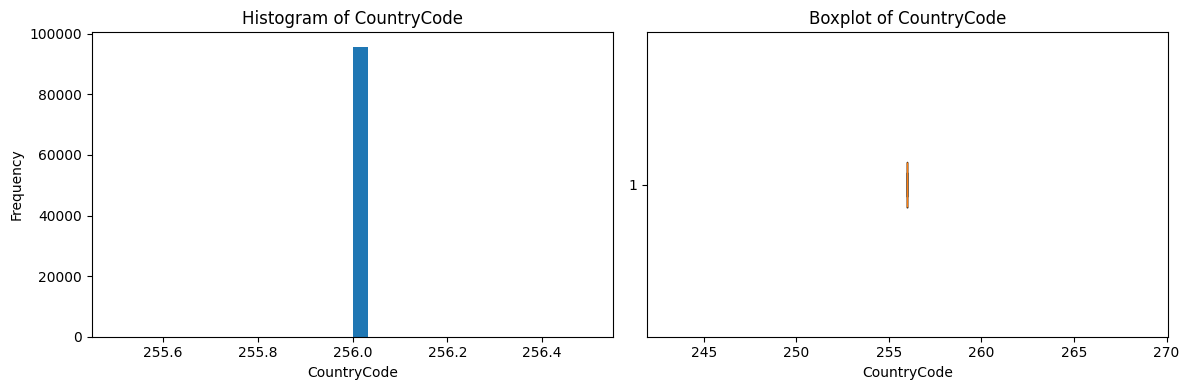

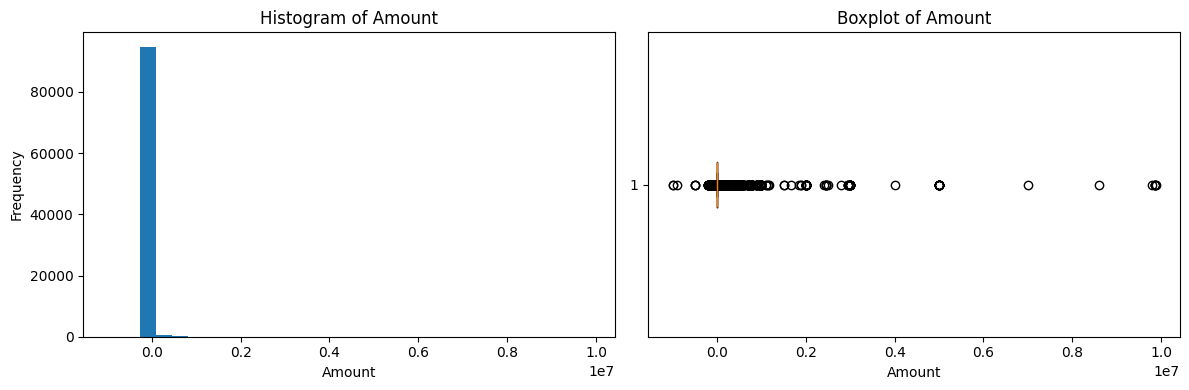

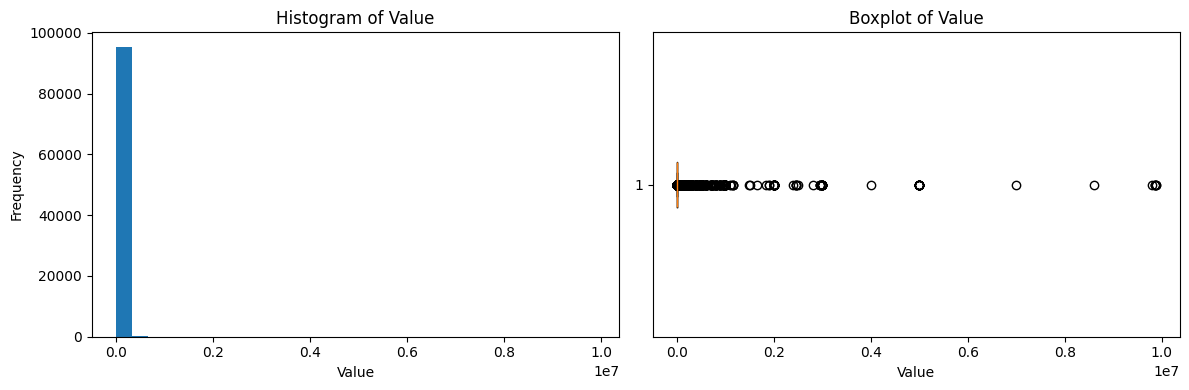

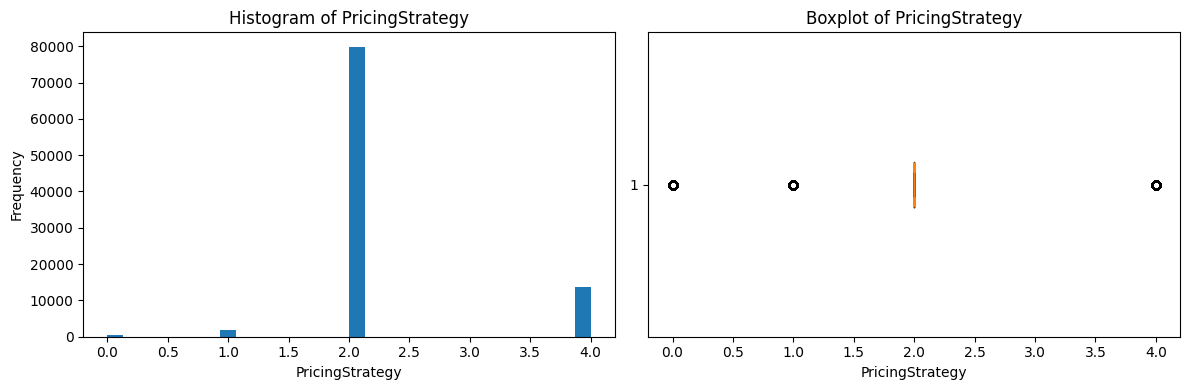

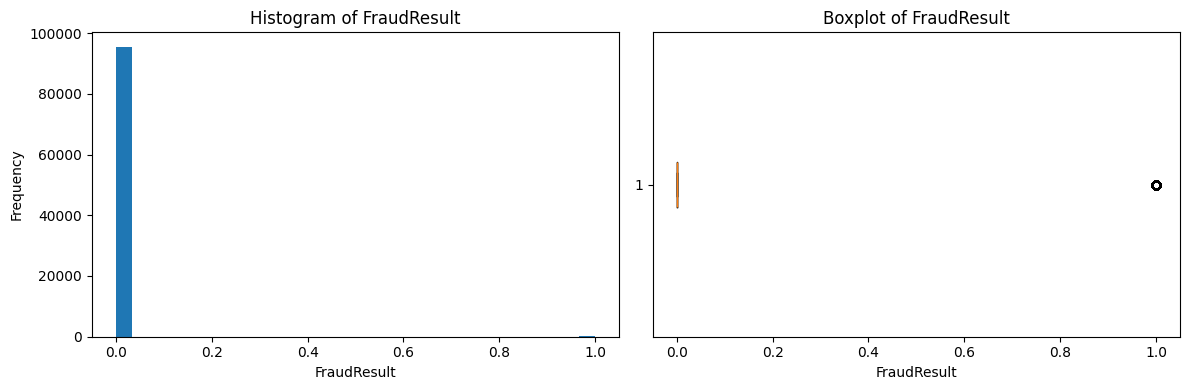

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

# Loop through each numeric column and plot
for col in numeric_cols.columns:
    plt.figure(figsize=(12, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    plt.hist(df[col].dropna(), bins=30)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
   

    # Boxplot
    plt.subplot(1, 2, 2)
    plt.boxplot(df[col].dropna(), vert=False)
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()


    

In [52]:
zero_summary = pd.DataFrame({
    "zero_count": df['FraudResult'].eq(0.00).sum(),
    "zero_percent": (df.eq(0.00).sum() / len(df)) * 100
   
})
print(zero_summary)

                      zero_count  zero_percent
TransactionId              95469      0.000000
BatchId                    95469      0.000000
AccountId                  95469      0.000000
SubscriptionId             95469      0.000000
CustomerId                 95469      0.000000
CurrencyCode               95469      0.000000
CountryCode                95469      0.000000
ProviderId                 95469      0.000000
ProductId                  95469      0.000000
ProductCategory            95469      0.000000
ChannelId                  95469      0.000000
Amount                     95469      0.000000
Value                      95469      0.000000
TransactionStartTime       95469      0.000000
PricingStrategy            95469      0.402459
FraudResult                95469     99.798248


## Destribution of Categorical columns

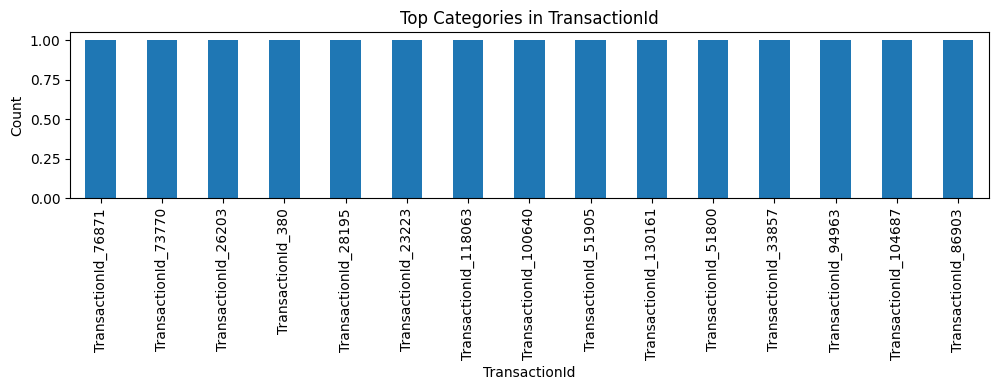

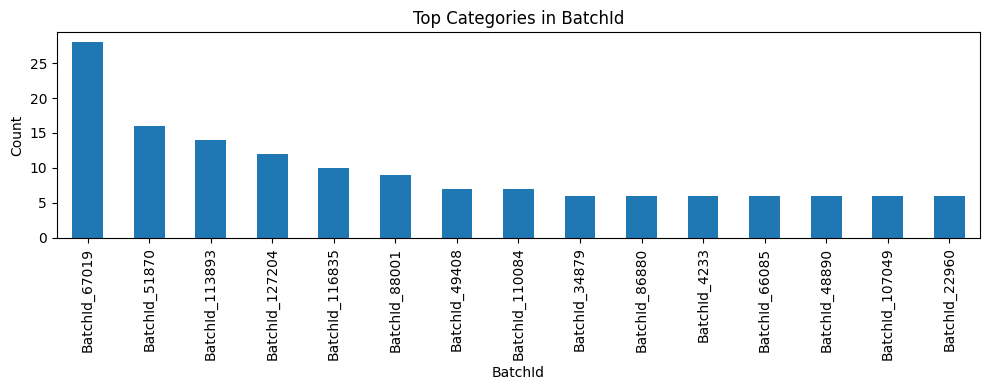

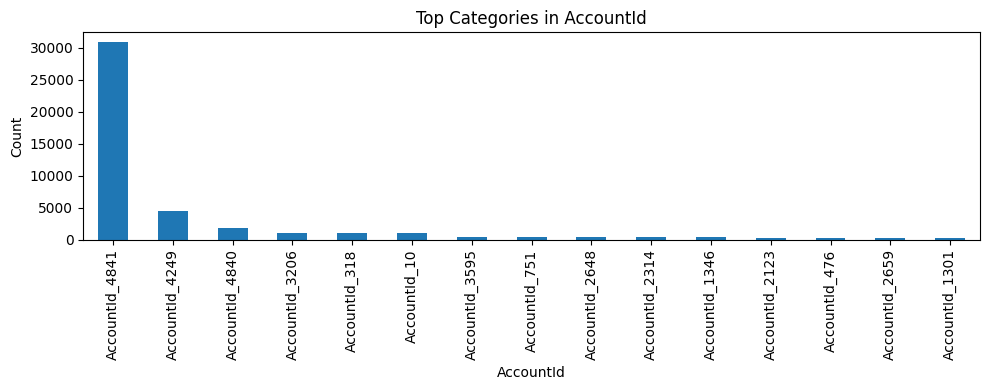

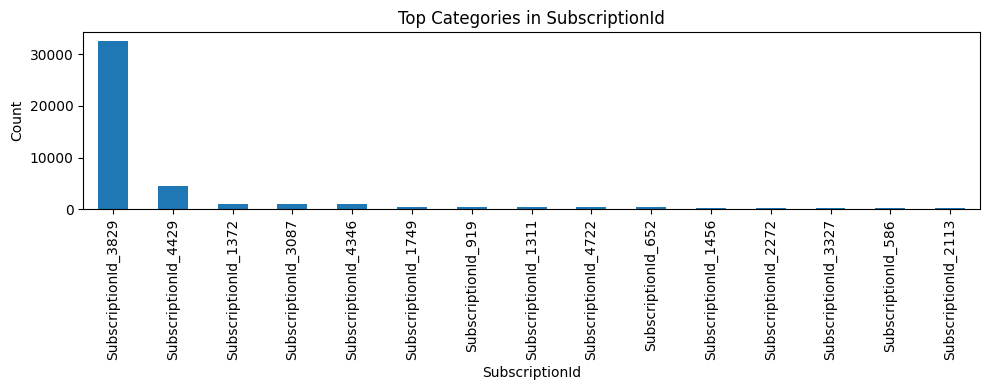

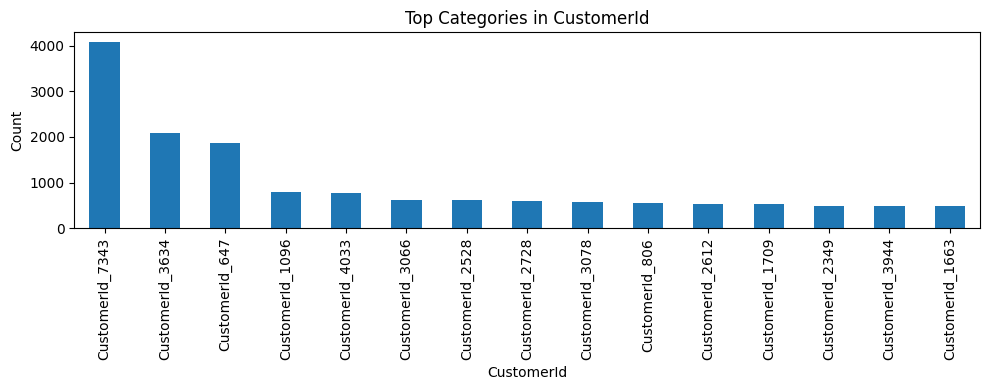

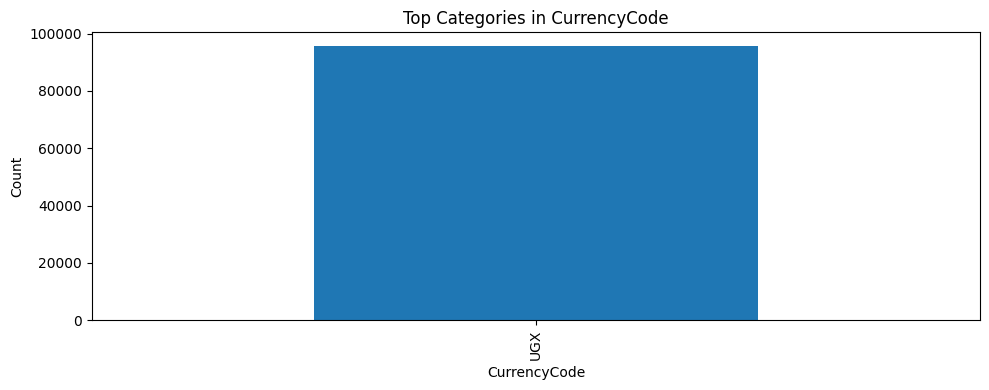

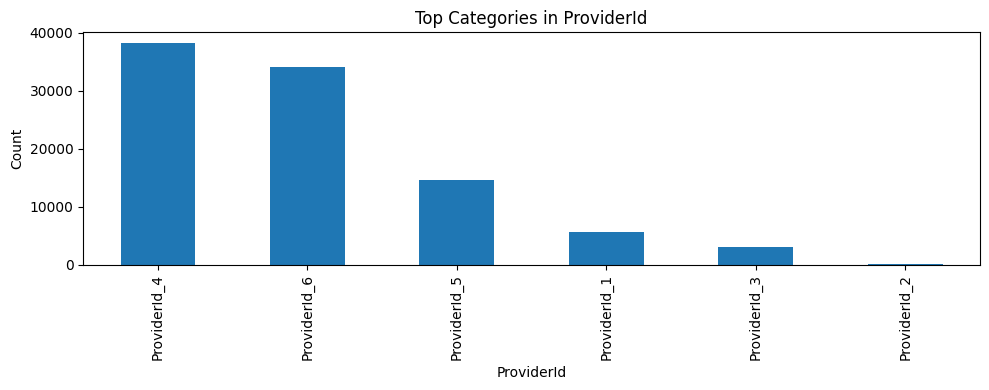

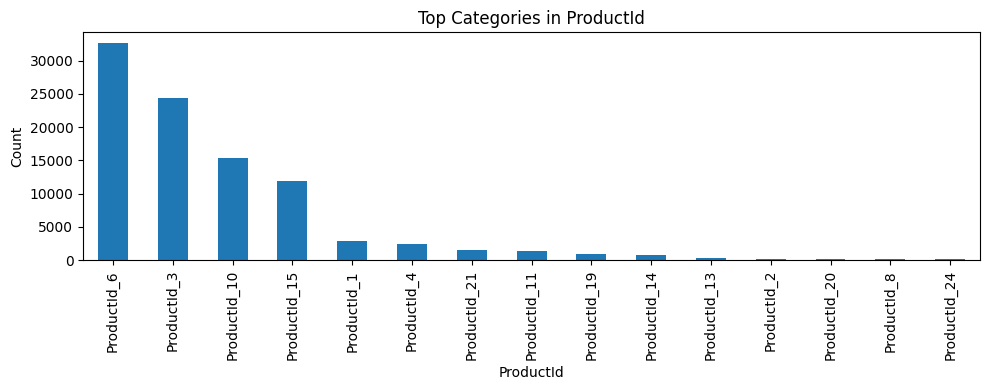

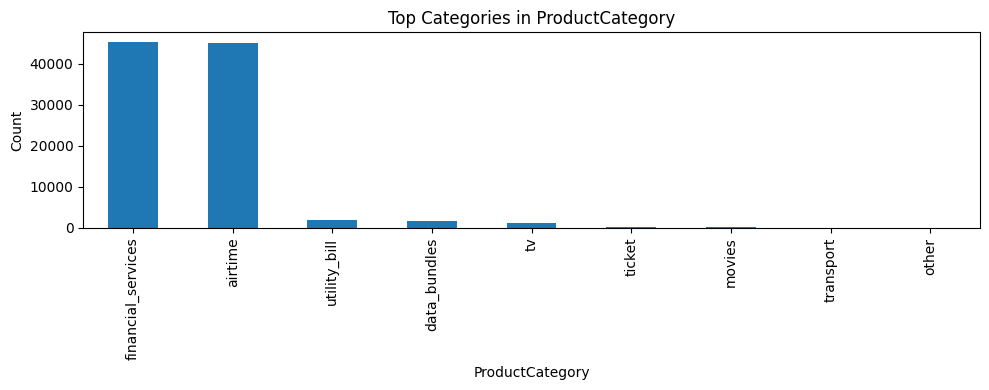

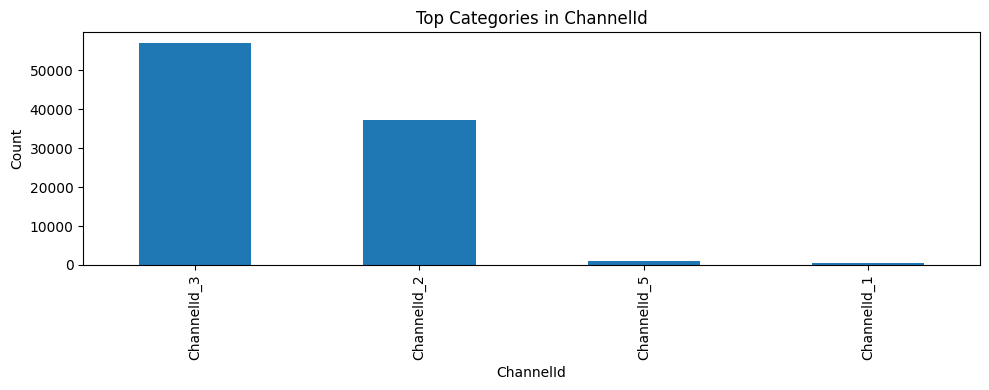

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Select categorical columns (object or category type)
categorical_cols = df.select_dtypes(include=['object'])


# Visualization: Bar plots for each categorical column
for col in categorical_cols.columns:
    plt.figure(figsize=(10, 4))
    
    df[col].value_counts().head(15).plot(kind='bar')
    plt.title(f"Top Categories in {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    
    plt.tight_layout()
    plt.show()


## Heat map showing the correlation between numeric features

📌 Correlation Matrix:


,CountryCode,Amount,Value,PricingStrategy,FraudResult
CountryCode,NaN,NaN,NaN,NaN,NaN
Amount,NaN,1.000000,0.989692,-0.061931,0.557370
Value,NaN,0.989692,1.000000,-0.017020,0.566739
PricingStrategy,NaN,-0.061931,-0.017020,1.000000,-0.033821
FraudResult,NaN,0.557370,0.566739,-0.033821,1.000000


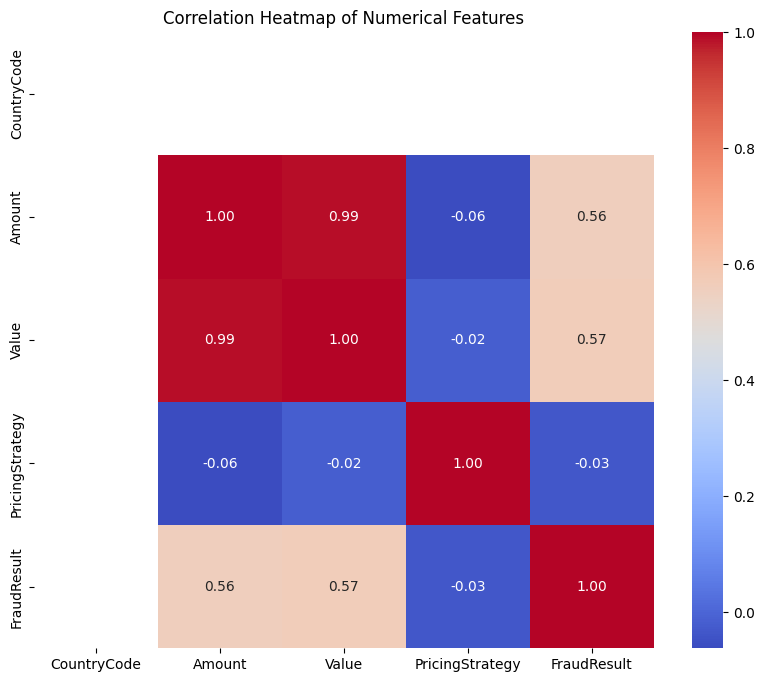


📌 Highest Positive & Negative Correlations With FraudResult:


,Correlation
FraudResult,1.000000
Value,0.566739
Amount,0.557370
PricingStrategy,-0.033821
CountryCode,NaN


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns only
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
corr_matrix = numeric_df.corr()

# Display correlation matrix
print("📌 Correlation Matrix:")
display(corr_matrix)

# Heatmap visualization
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# Show top correlations with FraudResult (if available)
if "FraudResult" in numeric_df.columns:
    print("\n📌 Highest Positive & Negative Correlations With FraudResult:")
    display(
        corr_matrix["FraudResult"]
        .sort_values(ascending=False)
        .to_frame("Correlation")
    )


## checking for missing data

In [42]:
import pandas as pd

# Count missing values
missing_count = df.isnull().sum()

# Percentage of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Combine into a summary table
missing_summary = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing %': missing_percentage.round(2)
})

# Display only columns with missing values
missing_summary = missing_summary[missing_summary['Missing Count'] > 0]

print(" Missing Value Summary:")
display(missing_summary.sort_values(by='Missing %', ascending=False))


 Missing Value Summary:


,Missing Count,Missing %


* No missing data found in the dataset 

## Outlier detection

In [50]:
from scipy import stats
import pandas as pd

# Select only continuous numeric columns (exclude integer flags like FraudResult or Category IDs)
continuous_cols = ['Amount', 'Value']  # Replace with all continuous numeric columns in your dataset

# Compute Z-scores
z_scores = stats.zscore(df[continuous_cols], nan_policy='omit')

# Convert to DataFrame with proper index
z_scores_df = pd.DataFrame(z_scores, columns=continuous_cols, index=df.index)

# Create boolean mask for outliers (abs(z) > 3)
outlier_mask = (z_scores_df.abs() > 3)

# Rows with at least one outlier
rows_with_outliers = outlier_mask.any(axis=1)
print(f"Number of rows with outliers: {rows_with_outliers.sum()}")

# View rows with outliers
df_outliers = df[rows_with_outliers]
display(df_outliers)


Number of rows with outliers: 269


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
131,TransactionId_60873,BatchId_93685,AccountId_3832,SubscriptionId_4161,CustomerId_4275,UGX,256,ProviderId_3,ProductId_15,financial_services,ChannelId_3,700000.0,700000,2018-11-15 08:04:51+00:00,0,1
146,TransactionId_28016,BatchId_125553,AccountId_2366,SubscriptionId_4834,CustomerId_7414,UGX,256,ProviderId_5,ProductId_9,financial_services,ChannelId_1,725000.0,725000,2018-11-15 08:20:09+00:00,2,1
155,TransactionId_1149,BatchId_10381,AccountId_3832,SubscriptionId_4161,CustomerId_4275,UGX,256,ProviderId_3,ProductId_15,financial_services,ChannelId_3,700000.0,700000,2018-11-15 08:31:57+00:00,0,1
2376,TransactionId_136904,BatchId_52644,AccountId_3692,SubscriptionId_3451,CustomerId_4134,UGX,256,ProviderId_1,ProductId_15,financial_services,ChannelId_3,700000.0,700000,2018-11-17 09:15:23+00:00,0,1
2452,TransactionId_88818,BatchId_54481,AccountId_3832,SubscriptionId_4161,CustomerId_4275,UGX,256,ProviderId_3,ProductId_15,financial_services,ChannelId_3,700000.0,700000,2018-11-17 11:49:46+00:00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94805,TransactionId_69673,BatchId_111976,AccountId_4687,SubscriptionId_4160,CustomerId_5155,UGX,256,ProviderId_3,ProductId_15,financial_services,ChannelId_3,2000000.0,2000000,2019-02-12 14:00:41+00:00,2,1
95108,TransactionId_128664,BatchId_128748,AccountId_1909,SubscriptionId_2496,CustomerId_2303,UGX,256,ProviderId_6,ProductId_3,airtime,ChannelId_3,500000.0,500000,2019-02-12 18:07:11+00:00,2,1
95262,TransactionId_33086,BatchId_40160,AccountId_1909,SubscriptionId_2496,CustomerId_2303,UGX,256,ProviderId_3,ProductId_15,financial_services,ChannelId_3,500000.0,500000,2019-02-12 21:31:21+00:00,2,1
95264,TransactionId_100613,BatchId_40160,AccountId_1909,SubscriptionId_2496,CustomerId_2303,UGX,256,ProviderId_3,ProductId_15,financial_services,ChannelId_3,500000.0,500000,2019-02-12 21:32:23+00:00,2,1


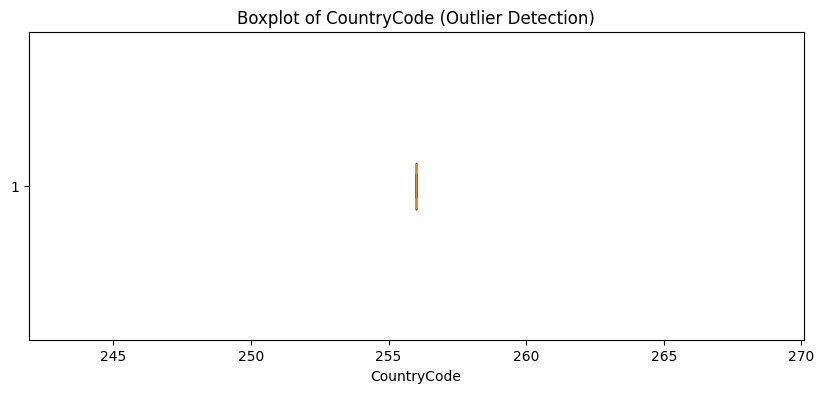

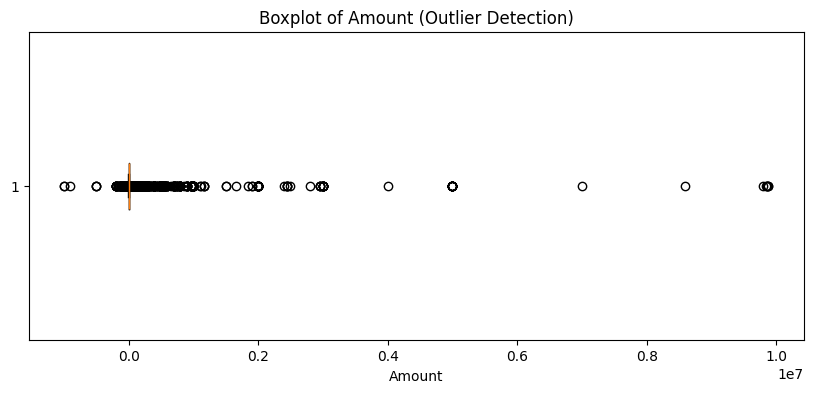

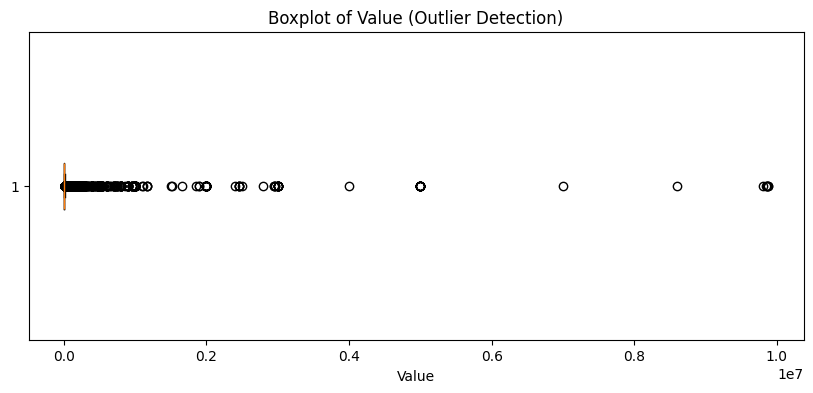

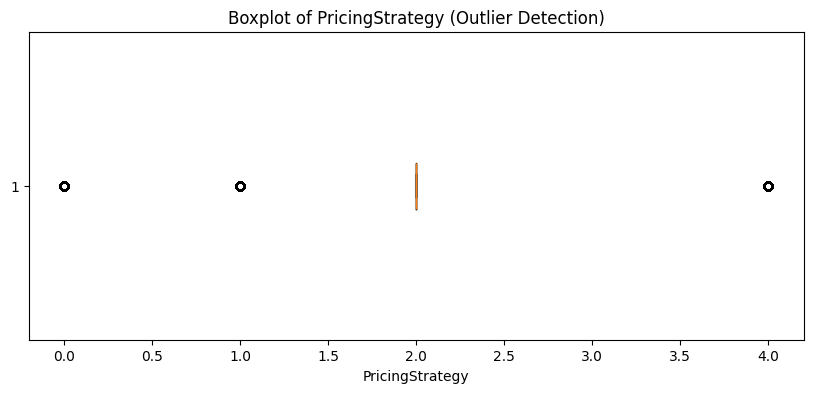

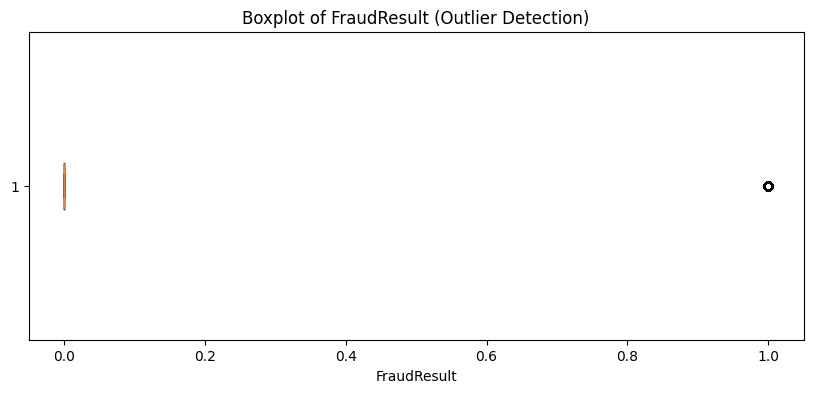

In [44]:
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

# Plot box plots for all numerical columns
for col in numeric_cols.columns:
    plt.figure(figsize=(10, 4))
    plt.boxplot(df[col].dropna(), vert=False)
    plt.title(f"Boxplot of {col} (Outlier Detection)")
    plt.xlabel(col)
    plt.show()


## Major Findings/ Insights 

### 1. I Found No Null Data in the Dataset

* **My Insight:** The dataset is entirely free of missing values.
* **My Significance:** This is a major advantage for me. I can immediately bypass the complex and sometimes subjective stage of **missing data imputation**. This saves me time and ensures my models won't inherit any bias introduced by filling in those gaps. I can proceed straight to checking for other data quality issues, such as extreme outliers or inconsistent formatting.

### 2. I Observed a Minimum (0.21%) Rate of Fraudulent Transactions

* **My Insight:** The positive class (fraud) represents only 0.21% of the total transactions.
* **My Significance:** This confirms that the dataset is **highly imbalanced**. This small percentage is the single biggest modeling challenge I face. I know I cannot rely on simple **Accuracy** as a performance metric, since a trivial model that predicts "no fraud" every time would still be $99.79\%$ accurate. I must instead prioritize metrics like **Recall** (to catch the most fraud cases) and the **Area Under the Precision-Recall Curve (AUPRC)**.
* **My Next Step:** I will need to use specialized techniques like **Oversampling** (e.g., SMOTE) or **Cost-Sensitive Learning** during model training to ensure the model learns from the scarce fraudulent examples.

### 3. I Noticed a Strong Correlation Between Two "Amount" Variables

* **My Insight:** Two features that appear to represent transaction amounts are strongly collinear, meaning they are likely redundant or near-identical copies.
* **My Significance:** This indicates **Multicollinearity**. While it won't severely hamper complex models like Gradient Boosting, it is inefficient. For simpler models (like Logistic Regression), this redundancy can make the feature coefficients unstable and hard for me to interpret.
* **My Next Step:** I will simplify the feature set by **removing one of the redundant "Amount" features**. This streamlines my model and reduces unnecessary complexity.

### 4. The Currency Used is the Ugandan Shilling (UGX)

* **My Contextual Finding:** The currency used in the transactions is the Ugandan Shilling.
* **My Significance:** This provides vital **economic and geographical context**. This frames the true scale of the numerical transaction values. As I move into time-series analysis, I must consider factors like the historical **inflation rate** and potential **exchange rate volatility** of the UGX, as these will affect the real value and risk assessment of the transactions over time.

